In [1]:
!pwd

/Users/nate_velarde/dsi/dsi_workspace/dsi_project_1


# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

##### 2. Does the data look complete? Are there any obvious issues with the observations?

##### 3. Create a data dictionary for the dataset.

## Step 2: Load the data.

##### 4. Load the data into a list of lists

##### Importing Packages

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Loading Dataset

The code to load in the data is provided below. 

The `with open(..., 'r') as f:` opens up a file in "read" mode (rather than "write"), and assigns this opened file to `f`. 

We then use the `.readlines()` built-in function to split the csv file on newlines and assign it to the variable `lines`.

In [3]:
file = "/Users/nate_velarde/dsi/dsi_repo/DSI_SM_3/projects/project-01/assets/sat_scores.csv"
with open(file,'r') as f:
    lines = f.readlines()

##### 5. Print the data

In [4]:
lines

['State,Rate,Verbal,Math\n',
 'CT,82,509,510\n',
 'NJ,81,499,513\n',
 'MA,79,511,515\n',
 'NY,77,495,505\n',
 'NH,72,520,516\n',
 'RI,71,501,499\n',
 'PA,71,500,499\n',
 'VT,69,511,506\n',
 'ME,69,506,500\n',
 'VA,68,510,501\n',
 'DE,67,501,499\n',
 'MD,65,508,510\n',
 'NC,65,493,499\n',
 'GA,63,491,489\n',
 'IN,60,499,501\n',
 'SC,57,486,488\n',
 'DC,56,482,474\n',
 'OR,55,526,526\n',
 'FL,54,498,499\n',
 'WA,53,527,527\n',
 'TX,53,493,499\n',
 'HI,52,485,515\n',
 'AK,51,514,510\n',
 'CA,51,498,517\n',
 'AZ,34,523,525\n',
 'NV,33,509,515\n',
 'CO,31,539,542\n',
 'OH,26,534,439\n',
 'MT,23,539,539\n',
 'WV,18,527,512\n',
 'ID,17,543,542\n',
 'TN,13,562,553\n',
 'NM,13,551,542\n',
 'IL,12,576,589\n',
 'KY,12,550,550\n',
 'WY,11,547,545\n',
 'MI,11,561,572\n',
 'MN,9,580,589\n',
 'KS,9,577,580\n',
 'AL,9,559,554\n',
 'NE,8,562,568\n',
 'OK,8,567,561\n',
 'MO,8,577,577\n',
 'LA,7,564,562\n',
 'WI,6,584,596\n',
 'AR,6,562,550\n',
 'UT,5,575,570\n',
 'IA,5,593,603\n',
 'SD,4,577,582\n',
 'N

##### Examining the lines object

lines object is a list of strings

The header is the first string in the list of strings. It contains the column names of our data.

Header row column names: 'State' 'Rate' 'Verbal' 'Math'

'Rate' appears to be the percentage of HS students in a state that take the SAT

Eyeballing the data suggests that 'Rate' has a wide range (MS: 4 - CT: 82)

Subsequent elements contain state name, rate, average verbal score, average math score

Final list element is 'All' the states with what looks like national averages for rate, verbal and math

There are still '\n' newline characters that were not removed by .readlines() - will need to clean up

From visual inspection of data there appears to be no missing data (empty fields) for any of the states


##### Removing the remaining newline `'\n'` characters with a for-loop

for-loop will iterate through the lines of the data and remove the unwanted newline characters.

**`.replace('\n', '')`** is a built-in string function that will take as the first argument the substring you want to replace, and as its second argument the string you want to replace it with.

In [5]:
cleaned_lines = []
for line in lines:  
    cleaned_lines.append(line.replace('\n',''))
cleaned_lines

['State,Rate,Verbal,Math',
 'CT,82,509,510',
 'NJ,81,499,513',
 'MA,79,511,515',
 'NY,77,495,505',
 'NH,72,520,516',
 'RI,71,501,499',
 'PA,71,500,499',
 'VT,69,511,506',
 'ME,69,506,500',
 'VA,68,510,501',
 'DE,67,501,499',
 'MD,65,508,510',
 'NC,65,493,499',
 'GA,63,491,489',
 'IN,60,499,501',
 'SC,57,486,488',
 'DC,56,482,474',
 'OR,55,526,526',
 'FL,54,498,499',
 'WA,53,527,527',
 'TX,53,493,499',
 'HI,52,485,515',
 'AK,51,514,510',
 'CA,51,498,517',
 'AZ,34,523,525',
 'NV,33,509,515',
 'CO,31,539,542',
 'OH,26,534,439',
 'MT,23,539,539',
 'WV,18,527,512',
 'ID,17,543,542',
 'TN,13,562,553',
 'NM,13,551,542',
 'IL,12,576,589',
 'KY,12,550,550',
 'WY,11,547,545',
 'MI,11,561,572',
 'MN,9,580,589',
 'KS,9,577,580',
 'AL,9,559,554',
 'NE,8,562,568',
 'OK,8,567,561',
 'MO,8,577,577',
 'LA,7,564,562',
 'WI,6,584,596',
 'AR,6,562,550',
 'UT,5,575,570',
 'IA,5,593,603',
 'SD,4,577,582',
 'ND,4,592,599',
 'MS,4,566,551',
 'All,45,506,514']

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [6]:
header = cleaned_lines[0]
header

'State,Rate,Verbal,Math'

In [7]:
data = cleaned_lines[1:]
data

['CT,82,509,510',
 'NJ,81,499,513',
 'MA,79,511,515',
 'NY,77,495,505',
 'NH,72,520,516',
 'RI,71,501,499',
 'PA,71,500,499',
 'VT,69,511,506',
 'ME,69,506,500',
 'VA,68,510,501',
 'DE,67,501,499',
 'MD,65,508,510',
 'NC,65,493,499',
 'GA,63,491,489',
 'IN,60,499,501',
 'SC,57,486,488',
 'DC,56,482,474',
 'OR,55,526,526',
 'FL,54,498,499',
 'WA,53,527,527',
 'TX,53,493,499',
 'HI,52,485,515',
 'AK,51,514,510',
 'CA,51,498,517',
 'AZ,34,523,525',
 'NV,33,509,515',
 'CO,31,539,542',
 'OH,26,534,439',
 'MT,23,539,539',
 'WV,18,527,512',
 'ID,17,543,542',
 'TN,13,562,553',
 'NM,13,551,542',
 'IL,12,576,589',
 'KY,12,550,550',
 'WY,11,547,545',
 'MI,11,561,572',
 'MN,9,580,589',
 'KS,9,577,580',
 'AL,9,559,554',
 'NE,8,562,568',
 'OK,8,567,561',
 'MO,8,577,577',
 'LA,7,564,562',
 'WI,6,584,596',
 'AR,6,562,550',
 'UT,5,575,570',
 'IA,5,593,603',
 'SD,4,577,582',
 'ND,4,592,599',
 'MS,4,566,551',
 'All,45,506,514']

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

##### Split the header and the data strings on commas

To split a string on the comma character, will use the **`.split(',')`** built-in function. 

Split the header on commas first and print it. You can see that the original string is now a list, with items that were originally separated by commas.

Splitting the header on commas.

Go from original string to a list of 4 strings - items that were originally separated by commas.

In [8]:
header = header.split(',')
header

['State', 'Rate', 'Verbal', 'Math']

Splitting data on commas.

Go from 'data' - a list of strings TO a list of a list of strings 'split_data'

This is accomplished by iterating through the strings in 'data' and using the .split(',') built-in function.

In [9]:
split_data = []
for datum in data:
    split_data.append(datum.split(','))

In [10]:
split_data

[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL', '12', '576', '589'],
 ['KY', '12', 

##### Creating a list of state names

Selecting an individual state

In [11]:
split_data[0][0]

'CT'

To create a list of states, need to iterate through each individual list ('row') in 'split_data'
and select the first element of that list

In [12]:
state_names = []
for row in split_data:
    state_names.append(row[0])

In [13]:
print state_names

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### 8. Print the types of each column

Did this problem both ways - looked at the data type of the columns (lists) as a whole as well as the type of each
individual element of those lists

In [14]:
for index, element in enumerate(header):
    
    split_data_columns = []
    for row in split_data:
        split_data_columns.append(row[index])
    
    print element + " column type: ", type(split_data_columns)

State column type:  <type 'list'>
Rate column type:  <type 'list'>
Verbal column type:  <type 'list'>
Math column type:  <type 'list'>


In [15]:
split_data_types = []

for row in split_data:
    
    new_row = []
    
    for index, element in enumerate(row):
        data_type = type(element)
        new_row.append(data_type)
    
    split_data_types.append(new_row)
    
split_data_types

# All of the data in the data set are strings

[[str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str, str, str],
 [str, str,

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

##### Need to clean up the data to convert string numbers to float numbers so we can do calculations later

Keeping first column as strings they are state names (abbreviations)

Not necessary for the data set based on visual inspection, but then check for empty fields
and if any are found, set them to 'None'

Convert 'string numbers' to floats so we can do calculations later

Remove the summary 'All' (last row) as its value may skew calculations and graphing

In [16]:
split_data_num = []
for row in split_data:
    new_row = []
    for index, element in enumerate(row):
        if index == 0:
            new_row.append(element)
        else:
            if element == '':
                new_row.append(None)
            else:
                new_row.append(float(element))
    split_data_num.append(new_row)
    
split_data_num

[['CT', 82.0, 509.0, 510.0],
 ['NJ', 81.0, 499.0, 513.0],
 ['MA', 79.0, 511.0, 515.0],
 ['NY', 77.0, 495.0, 505.0],
 ['NH', 72.0, 520.0, 516.0],
 ['RI', 71.0, 501.0, 499.0],
 ['PA', 71.0, 500.0, 499.0],
 ['VT', 69.0, 511.0, 506.0],
 ['ME', 69.0, 506.0, 500.0],
 ['VA', 68.0, 510.0, 501.0],
 ['DE', 67.0, 501.0, 499.0],
 ['MD', 65.0, 508.0, 510.0],
 ['NC', 65.0, 493.0, 499.0],
 ['GA', 63.0, 491.0, 489.0],
 ['IN', 60.0, 499.0, 501.0],
 ['SC', 57.0, 486.0, 488.0],
 ['DC', 56.0, 482.0, 474.0],
 ['OR', 55.0, 526.0, 526.0],
 ['FL', 54.0, 498.0, 499.0],
 ['WA', 53.0, 527.0, 527.0],
 ['TX', 53.0, 493.0, 499.0],
 ['HI', 52.0, 485.0, 515.0],
 ['AK', 51.0, 514.0, 510.0],
 ['CA', 51.0, 498.0, 517.0],
 ['AZ', 34.0, 523.0, 525.0],
 ['NV', 33.0, 509.0, 515.0],
 ['CO', 31.0, 539.0, 542.0],
 ['OH', 26.0, 534.0, 439.0],
 ['MT', 23.0, 539.0, 539.0],
 ['WV', 18.0, 527.0, 512.0],
 ['ID', 17.0, 543.0, 542.0],
 ['TN', 13.0, 562.0, 553.0],
 ['NM', 13.0, 551.0, 542.0],
 ['IL', 12.0, 576.0, 589.0],
 ['KY', 12.0, 

##### Removing the last row

In [17]:
split_data_num = split_data_num[0:-1]
split_data_num

[['CT', 82.0, 509.0, 510.0],
 ['NJ', 81.0, 499.0, 513.0],
 ['MA', 79.0, 511.0, 515.0],
 ['NY', 77.0, 495.0, 505.0],
 ['NH', 72.0, 520.0, 516.0],
 ['RI', 71.0, 501.0, 499.0],
 ['PA', 71.0, 500.0, 499.0],
 ['VT', 69.0, 511.0, 506.0],
 ['ME', 69.0, 506.0, 500.0],
 ['VA', 68.0, 510.0, 501.0],
 ['DE', 67.0, 501.0, 499.0],
 ['MD', 65.0, 508.0, 510.0],
 ['NC', 65.0, 493.0, 499.0],
 ['GA', 63.0, 491.0, 489.0],
 ['IN', 60.0, 499.0, 501.0],
 ['SC', 57.0, 486.0, 488.0],
 ['DC', 56.0, 482.0, 474.0],
 ['OR', 55.0, 526.0, 526.0],
 ['FL', 54.0, 498.0, 499.0],
 ['WA', 53.0, 527.0, 527.0],
 ['TX', 53.0, 493.0, 499.0],
 ['HI', 52.0, 485.0, 515.0],
 ['AK', 51.0, 514.0, 510.0],
 ['CA', 51.0, 498.0, 517.0],
 ['AZ', 34.0, 523.0, 525.0],
 ['NV', 33.0, 509.0, 515.0],
 ['CO', 31.0, 539.0, 542.0],
 ['OH', 26.0, 534.0, 439.0],
 ['MT', 23.0, 539.0, 539.0],
 ['WV', 18.0, 527.0, 512.0],
 ['ID', 17.0, 543.0, 542.0],
 ['TN', 13.0, 562.0, 553.0],
 ['NM', 13.0, 551.0, 542.0],
 ['IL', 12.0, 576.0, 589.0],
 ['KY', 12.0, 

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [18]:
state_dictionary = {}

for row in split_data_num:
    state_data_points = []
    for index, element in enumerate(row):
        if index != 0:
            state_data_points.append(element)
            
    state_dictionary[row[0]] = state_data_points
    
print state_dictionary
    

{'WA': [53.0, 527.0, 527.0], 'DE': [67.0, 501.0, 499.0], 'DC': [56.0, 482.0, 474.0], 'WI': [6.0, 584.0, 596.0], 'WV': [18.0, 527.0, 512.0], 'HI': [52.0, 485.0, 515.0], 'FL': [54.0, 498.0, 499.0], 'WY': [11.0, 547.0, 545.0], 'NH': [72.0, 520.0, 516.0], 'NJ': [81.0, 499.0, 513.0], 'NM': [13.0, 551.0, 542.0], 'TX': [53.0, 493.0, 499.0], 'LA': [7.0, 564.0, 562.0], 'NC': [65.0, 493.0, 499.0], 'ND': [4.0, 592.0, 599.0], 'NE': [8.0, 562.0, 568.0], 'TN': [13.0, 562.0, 553.0], 'NY': [77.0, 495.0, 505.0], 'PA': [71.0, 500.0, 499.0], 'RI': [71.0, 501.0, 499.0], 'NV': [33.0, 509.0, 515.0], 'VA': [68.0, 510.0, 501.0], 'CO': [31.0, 539.0, 542.0], 'AK': [51.0, 514.0, 510.0], 'AL': [9.0, 559.0, 554.0], 'AR': [6.0, 562.0, 550.0], 'VT': [69.0, 511.0, 506.0], 'IL': [12.0, 576.0, 589.0], 'GA': [63.0, 491.0, 489.0], 'IN': [60.0, 499.0, 501.0], 'IA': [5.0, 593.0, 603.0], 'OK': [8.0, 567.0, 561.0], 'AZ': [34.0, 523.0, 525.0], 'CA': [51.0, 498.0, 517.0], 'ID': [17.0, 543.0, 542.0], 'CT': [82.0, 509.0, 510.0],

##### 11. Create a dictionary with the values for each of the numeric columns

In [19]:
column_dictionary = {}
col_index = 0

for head in header[1:]:
    col_index += 1
    column_list = []
    
    for row in split_data_num:

        column_list.append(row[col_index])
        column_dictionary[head] = column_list

print column_dictionary

{'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0], 'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0], 'Verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.

## Step 3: Describe the data

##### 12. Print the min and max of each column

##### Printing the maximum of each numeric column

In [20]:
for head in header[1:]:
    column_max_value = max(column_dictionary.get(head))
    print head + " Column Maximum Value: ", column_max_value

Rate Column Maximum Value:  82.0
Verbal Column Maximum Value:  593.0
Math Column Maximum Value:  603.0


##### Printing the minimum of each numeric column

In [21]:
for head in header[1:]:
    column_min_value = min(column_dictionary.get(head))
    print head + " Column Minimum Value: ", column_min_value

Rate Column Minimum Value:  4.0
Verbal Column Minimum Value:  482.0
Math Column Minimum Value:  439.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [22]:
def std_dev_c(dictionary, header_row, col_number):
    column_values = []
    column_values = dictionary.get(header_row[col_number])
    column_mean = sum(column_values)/len(column_values)
    column_diffs_sqd = [(i - column_mean) ** 2 for i in column_values]
    column_variance = sum(column_diffs_sqd) / len(column_diffs_sqd)
    column_stdev = column_variance ** (0.5)
    
    print header_row[col_number] + " Column Summary Statistics"
    print "Mean: ", column_mean
    print "Variance: ", column_variance
    print "Standard Deviation: ", column_stdev
    print ""

##### Calling the function for each column

In [23]:
# Calling the function by specifying arguments for: dictionary, header row and column index number

std_dev_c(column_dictionary, header, 1)
std_dev_c(column_dictionary, header, 2)
std_dev_c(column_dictionary, header, 3)

Rate Column Summary Statistics
Mean:  37.0
Variance:  744.156862745
Standard Deviation:  27.2792386761

Verbal Column Summary Statistics
Mean:  532.529411765
Variance:  1091.11188005
Standard Deviation:  33.0319826842

Math Column Summary Statistics
Mean:  531.843137255
Variance:  1290.95578624
Standard Deviation:  35.9298731731



##### Trying it another way, this function calculates standard deviation function for all the columns at once (needs a for loop though)

In [24]:
def std_dev_d(dictionary):
    for head in header[1:]:
        column_values = []
        column_values = dictionary.get(head)
        column_mean = sum(column_values)/len(column_values)
        column_diffs_sqd = [(i - column_mean) ** 2 for i in column_values]
        column_variance = sum(column_diffs_sqd) / len(column_diffs_sqd)
        column_stdev = column_variance ** (0.5)
    
        print head + " Column Summary Statistics"
        print "Mean: ", column_mean
        print "Variance: ", column_variance
        print "Standard Deviation: ", column_stdev
        print ""

##### Calling the function for a dictionary

In [25]:
std_dev_d(column_dictionary)

Rate Column Summary Statistics
Mean:  37.0
Variance:  744.156862745
Standard Deviation:  27.2792386761

Verbal Column Summary Statistics
Mean:  532.529411765
Variance:  1091.11188005
Standard Deviation:  33.0319826842

Math Column Summary Statistics
Mean:  531.843137255
Variance:  1290.95578624
Standard Deviation:  35.9298731731



## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

##### Rate Histogram

(array([ 16.,   6.,   2.,   3.,   0.,   0.,   9.,   4.,   7.,   4.]),
 array([  4. ,  11.8,  19.6,  27.4,  35.2,  43. ,  50.8,  58.6,  66.4,
         74.2,  82. ]),
 <a list of 10 Patch objects>)

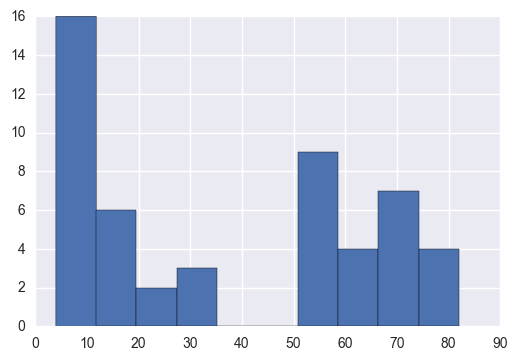

In [26]:
plt.hist(column_dictionary['Rate'])

##### 15. Plot the Math distribution

##### Math Histogram

(array([  1.,   0.,   2.,  10.,  12.,   3.,   9.,   5.,   4.,   5.]),
 array([ 439. ,  455.4,  471.8,  488.2,  504.6,  521. ,  537.4,  553.8,
         570.2,  586.6,  603. ]),
 <a list of 10 Patch objects>)

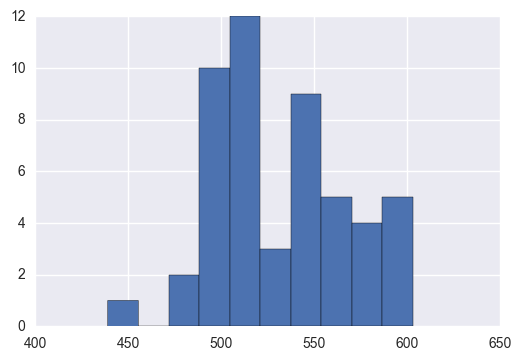

In [27]:
plt.hist(column_dictionary['Math'])

##### 16. Plot the Verbal distribution

##### Verbal Histogram

(array([ 6.,  8.,  8.,  3.,  3.,  4.,  3.,  7.,  6.,  3.]),
 array([ 482. ,  493.1,  504.2,  515.3,  526.4,  537.5,  548.6,  559.7,
         570.8,  581.9,  593. ]),
 <a list of 10 Patch objects>)

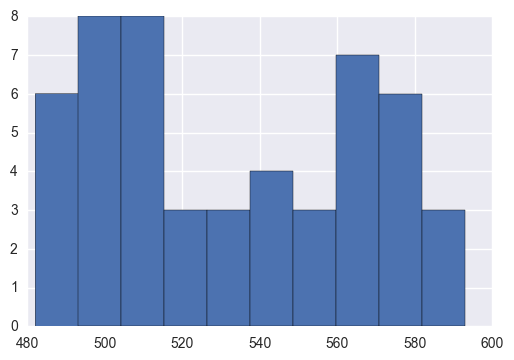

In [28]:
plt.hist(column_dictionary['Verbal'])

##### 17. What is the typical assumption for data distribution?

The typical assumption for data distribution is that it is normally distributed.

##### 18. Does that distribution hold true for our data?

No.  

From the histogram, the Rate data is clearly not normal as the bulk of the data points lie
at the extreme ends of the distribution.

The Math data is the most 'normal' looking of the three columns as many data points are roughly 
clustered near the mean of 532.

However, relative to a normal distribution, the Math data has fewer data points at the left end 
of the tail and more on the right tail - skewed to the right.

If the Math data was normally distributed, you would expect about 16% of the 51 observations (~8) 
to be above 560 which is roughly one standard deviation (36) above the mean. There are 16 observations >= 560.

The Verbal data is not normal based on visual inspection.  While the Verbal mean score is 533, with a standard 
deviation of 33 there are 14 observations below 500 and 16 observations above 560 which are both well above the 'normal' expectation of 8.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

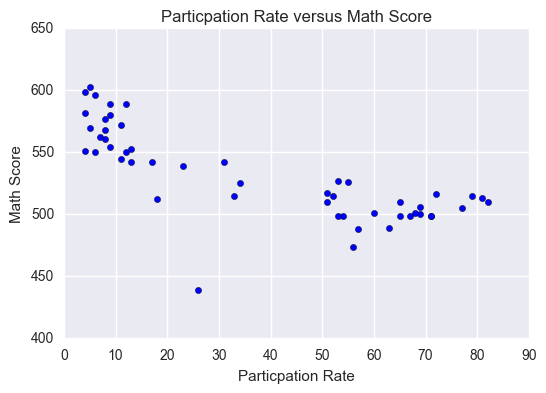

In [29]:
plt.scatter(column_dictionary['Rate'], column_dictionary['Math'])
plt.title('Particpation Rate versus Math Score')
plt.xlabel('Particpation Rate')
plt.ylabel('Math Score')
plt.show()

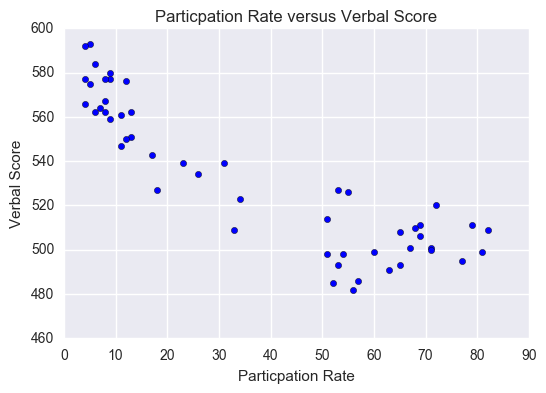

In [30]:
plt.scatter(column_dictionary['Rate'], column_dictionary['Verbal'])
plt.title('Particpation Rate versus Verbal Score')
plt.xlabel('Particpation Rate')
plt.ylabel('Verbal Score')
plt.show()

##### Scatter Plot of Math Score versus Verbal Score

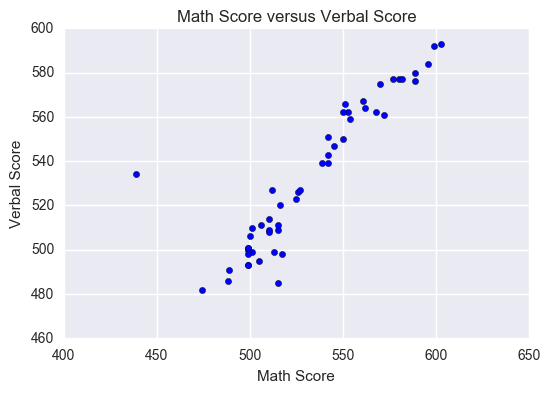

In [31]:
plt.scatter(column_dictionary['Math'], column_dictionary['Verbal'])
plt.title('Math Score versus Verbal Score')
plt.xlabel('Math Score')
plt.ylabel('Verbal Score')
plt.show()

##### 20. Are there any interesting relationships to note?

There is an interesting relationship between Particpation Rate ('Rate') and Math and Verbal scores.

The lower the state Participation Rate, the higher the score.

The effect is most pronounced in States with Particpation Rates lower than 50%.

At first glance, one would not expect any relationship between Participation Rate and test scores.
However, the relationship makes sense in the context that those students taking the SAT in low
participation states (which also correspond to lower income states) are not representative of 
the student overall population in those states.  As the SAT is required for college admission, the
students taking the SAT from low participation states probably represent the best and brightest in those
states.  

Looking at the issue from the other side of the participation rate spectrum, once the particpation rate
is above 50%, the negative relationship between particpation rate and test scores becomes less pronounced.

From the Math Score/Verbal Score scatterplot, there looks to be a good relationship between Math and Verbal
scores - higher the average Math score, the higher the average Verbal score.

In each of the three plots, there are one or two outliers that warrant further investigation.

##### 21. Create box plots for each variable. 

##### Rate Boxplot

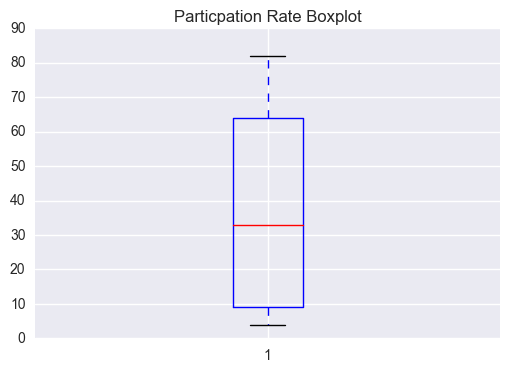

In [32]:
plt.boxplot(column_dictionary['Rate'])
plt.title('Particpation Rate Boxplot')
plt.show()

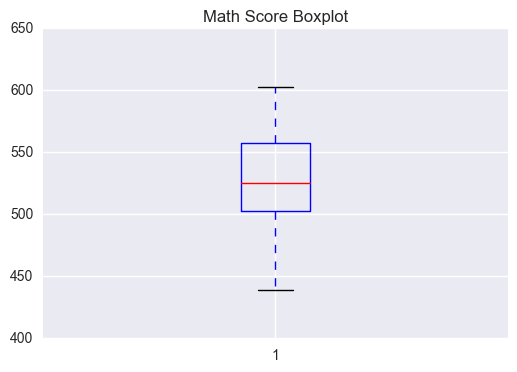

In [33]:
plt.boxplot(column_dictionary['Math'])
plt.title('Math Score Boxplot')
plt.show()

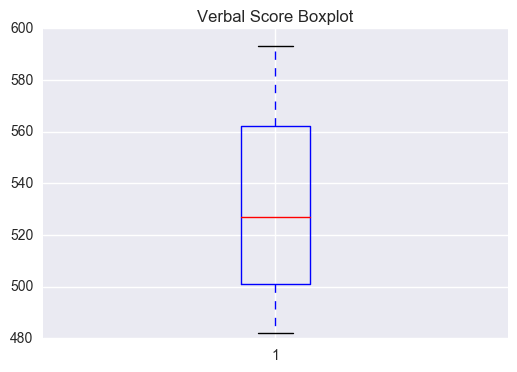

In [34]:
plt.boxplot(column_dictionary['Verbal'])
plt.title('Verbal Score Boxplot')
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 